# Ph√¢n t√≠ch d·ªØ li·ªáu th·ªùi thi·∫øt
### 1.D·ªØ li·ªáu v√† B√†i to√°n
D·ªØ li·ªáu bao g·ªìm c√°c c·ªôt:

- year, month, day, hour_value, minute: Th√¥ng tin th·ªùi gian (c√≥ th·ªÉ d√πng ƒë·ªÉ t·∫°o ƒë·∫∑c tr∆∞ng th·ªùi gian ho·∫∑c l·ªçc d·ªØ li·ªáu).
- weather: Bi·∫øn m·ª•c ti√™u (target) cho b√†i to√°n ph√¢n lo·∫°i, c√≥ c√°c gi√° tr·ªã nh∆∞ Clear, Cloudy, Rainy, Foggy.
- temperature: Nhi·ªát ƒë·ªô (ƒë·ªô C).
- wind_speed: T·ªëc ƒë·ªô gi√≥ (km/h).
- wind_angle: G√≥c gi√≥ (ƒë·ªô).
- humidity: ƒê·ªô ·∫©m (%).
- pressure: √Åp su·∫•t kh√≠ quy·ªÉn (hPa).
- visibility: T·∫ßm nh√¨n (km).

B√†i to√°n ph√¢n lo·∫°i: D·ª± ƒëo√°n tr·∫°ng th√°i th·ªùi ti·∫øt (weather) d·ª±a tr√™n c√°c ƒë·∫∑c tr∆∞ng nh∆∞ nhi·ªát ƒë·ªô, ƒë·ªô ·∫©m, √°p su·∫•t, v.v.

B√†i to√°n ph√¢n c·ª•m: Nh√≥m c√°c quan s√°t th·ªùi ti·∫øt th√†nh c√°c c·ª•m d·ª±a tr√™n s·ª± t∆∞∆°ng ƒë·ªìng c·ªßa c√°c ƒë·∫∑c tr∆∞ng, kh√¥ng s·ª≠ d·ª•ng nh√£n weather.

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Th·ªëng k√™ m√¥ t·∫£ d·ªØ li·ªáu


In [77]:
df = pd.read_csv('Clean_data/clean_data_train.csv')
print(df.describe())

               year         month           day    hour_value        minute  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean    2020.944140      6.492306     15.742745     11.564238     15.051215   
std        1.410013      3.448729      8.797215      6.946748     15.000004   
min     2019.000000      1.000000      1.000000      0.000000      0.000000   
25%     2020.000000      4.000000      8.000000      5.000000      0.000000   
50%     2021.000000      6.000000     16.000000     12.000000     30.000000   
75%     2022.000000      9.000000     23.000000     18.000000     30.000000   
max     2023.000000     12.000000     31.000000     23.000000     30.000000   

        temperature    wind_speed    wind_angle      humidity      pressure  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean      26.940457      7.795118    135.532875     77.711150   1010.667130   
std        4.110240      5.627292    115.138290    

weather
Clear     59321
Cloudy    11932
Rainy      8099
Foggy      1761
Stormy      895
Name: count, dtype: int64


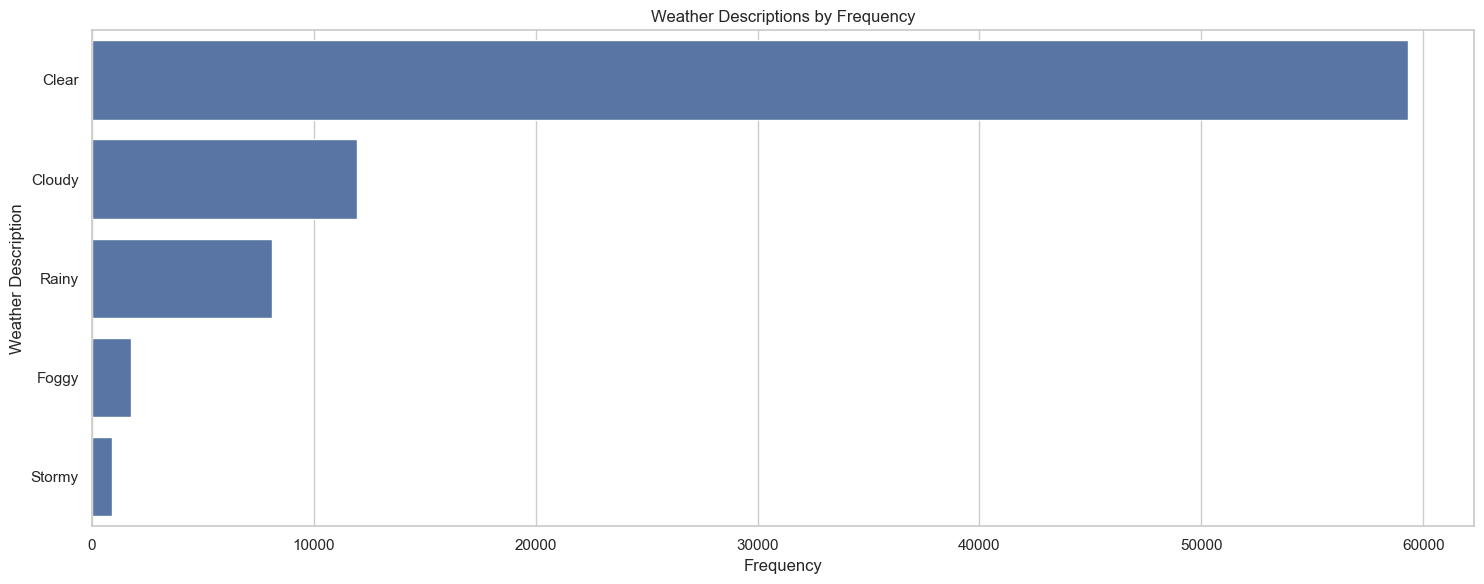

In [78]:
print(df['weather'].value_counts())

# V·∫Ω bi·ªÉu ƒë·ªì t·∫ßn su·∫•t cho c√°c gi√° tr·ªã weather
plt.figure(figsize=(15, 6))
weather_counts = df['weather'].value_counts().head(20)
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Weather Descriptions by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Weather Description')
plt.tight_layout()
plt.show()

## 2. Ph√¢n t√≠ch d·ªØ li·ªáu v√† l·ª±a ch·ªçn ƒë·∫∑c tr∆∞ng

### 2.1 T∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng s·ªë:

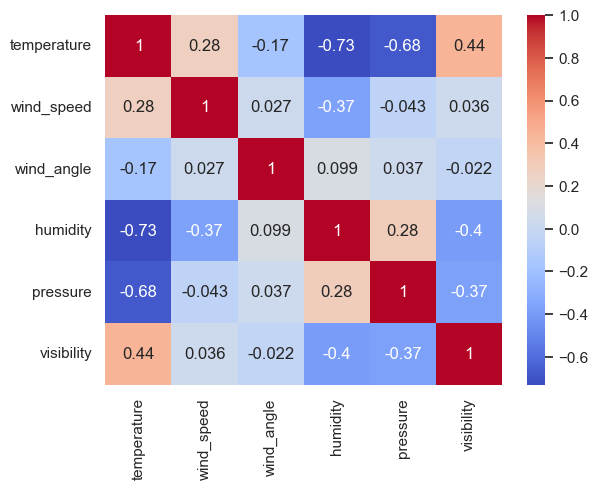

In [79]:
# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = df[['temperature', 'wind_speed', 'wind_angle', 'humidity', 'pressure', 'visibility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Kh√¥ng c√≥ ƒë·∫∑c tr∆∞ng n√†o c√≥ t∆∞∆°ng quan cao v·ªõi nhau, ch∆∞a c·∫ßn lo·∫°i b·ªè ƒë·∫∑c tr∆∞ng.

#### Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng theo weather

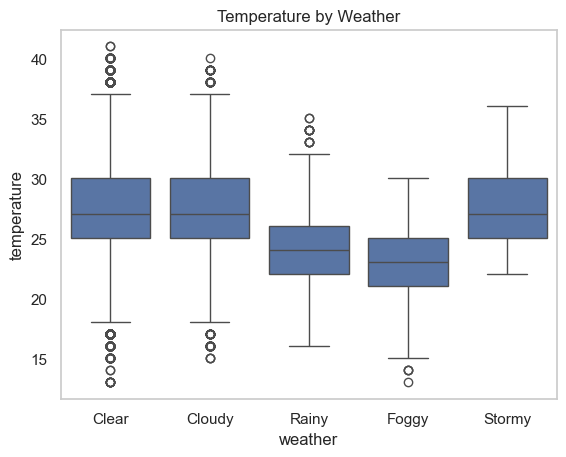

In [80]:
# Boxplot: temperature by Weather
sns.boxplot(x='weather', y='temperature', data=df)
plt.title('Temperature by Weather')
plt.grid(False)
plt.show()


1. Temperature by Weather

    Nh·∫≠n x√©t:
    - Nhi·ªát ƒë·ªô trung b√¨nh (median) dao ƒë·ªông trong kho·∫£ng 25-30¬∞C cho t·∫•t c·∫£ c√°c lo·∫°i th·ªùi ti·∫øt, kh√¥ng c√≥ s·ª± kh√°c bi·ªát l·ªõn gi·ªØa c√°c l·ªõp (Clear, Cloudy, Rainy, Foggy, Stormy).
    - Ph√¢n b·ªë nhi·ªát ƒë·ªô kh√° t∆∞∆°ng ƒë·ªìng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt, v·ªõi IQR (kho·∫£ng t·ª© ph√¢n v·ªã) g·∫ßn gi·ªëng nhau.
    - C√≥ m·ªôt s·ªë gi√° tr·ªã ngo·∫°i lai (outliers) ·ªü c·∫£ nƒÉm lo·∫°i th·ªùi ti·∫øt, ƒë·∫∑c bi·ªát ·ªü Clear v√† Cloudy (nhi·ªát ƒë·ªô tr√™n 35¬∞C v√† d∆∞·ªõi 20¬∞C).

    K·∫øt lu·∫≠n:
    - Temperature c√≥ s·ª± kh√°c bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt nh∆∞ng kho·∫£ng c√°c nhi·ªát ƒë·ªô l·∫°i th·∫•p, n√™n c√≥ th·ªÉ l√† ƒë·∫∑c tr∆∞ng kh√¥ng m·∫°nh cho b√†i to√°n ph√¢n lo·∫°i.
    - Nhi·ªát ƒë·ªô c√≥ th·ªÉ h·ªØu √≠ch trong b√†i to√°n ph√¢n c·ª•m, v√¨ n√≥ ph·∫£n √°nh m·ªôt ƒë·∫∑c t√≠nh v·∫≠t l√Ω quan tr·ªçng c·ªßa th·ªùi ti·∫øt.

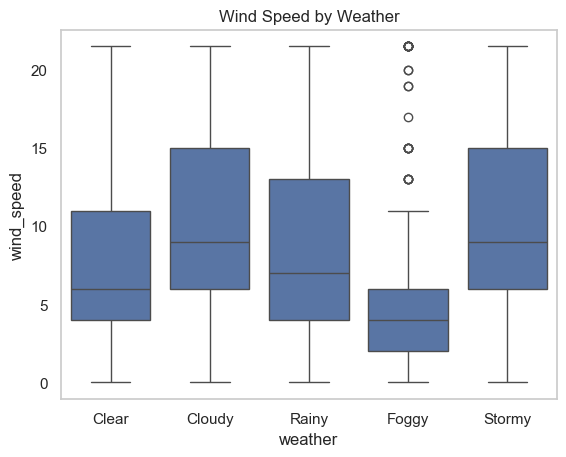

In [81]:
# Boxplot: wind_speed by Weather
sns.boxplot(x='weather', y='wind_speed', data=df)
plt.title('Wind Speed by Weather')
plt.grid(False)
plt.show()


2. Wind Speed by Weather

    Nh·∫≠n x√©t:
    - T·ªëc ƒë·ªô gi√≥ trung b√¨nh (median) dao ƒë·ªông t·ª´ 5-15 km/h, nh∆∞ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng ch√∫ √Ω:
    - Rainy c√≥ t·ªëc ƒë·ªô gi√≥ cao nh·∫•t, v·ªõi nhi·ªÅu gi√° tr·ªã ngo·∫°i lai v∆∞·ª£t tr√™n 50 km/h (cao nh·∫•t l√™n t·ªõi 70 km/h).
    - Foggy c√≥ t·ªëc ƒë·ªô gi√≥ th·∫•p nh·∫•t, h·∫ßu h·∫øt d∆∞·ªõi 10 km/h.
    - Clear, Cloudy, v√† Stormy c√≥ ph√¢n b·ªë kh√° t∆∞∆°ng ƒë·ªìng, dao ƒë·ªông trong kho·∫£ng 5-20 km/h.
    - Rainy c√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i lai l·ªõn, cho th·∫•y t·ªëc ƒë·ªô gi√≥ cao b·∫•t th∆∞·ªùng trong ƒëi·ªÅu ki·ªán m∆∞a.
    
    K·∫øt lu·∫≠n:
    - Wind_speed l√† m·ªôt ƒë·∫∑c tr∆∞ng quan tr·ªçng cho b√†i to√°n ph√¢n lo·∫°i, v√¨ n√≥ c√≥ s·ª± kh√°c bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt, ƒë·∫∑c bi·ªát l√† Rainy v√† Foggy.

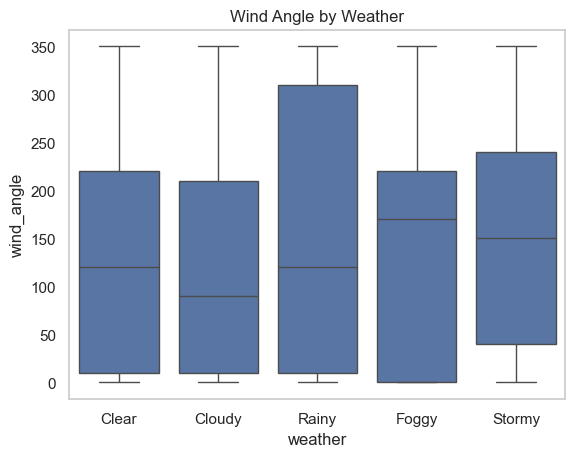

In [82]:
# Boxplot: wind_angle by Weather
sns.boxplot(x='weather', y='wind_angle', data=df)
plt.title('Wind Angle by Weather')
plt.grid(False)
plt.show()


3. Wind Angle by Weather

    Nh·∫≠n x√©t:
    - G√≥c gi√≥ trung b√¨nh dao ƒë·ªông t·ª´ 150-250 ƒë·ªô, nh∆∞ng kh√¥ng c√≥ s·ª± kh√°c bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt.
    - Rainy c√≥ ph√¢n b·ªë r·ªông h∆°n (IQR l·ªõn h∆°n), dao ƒë·ªông t·ª´ kho·∫£ng 100 ƒë·∫øn 300 ƒë·ªô, nh∆∞ng c√°c lo·∫°i th·ªùi ti·∫øt kh√°c (Clear, Cloudy, Foggy, Stormy) c√≥ ph√¢n b·ªë kh√° ƒë·ªìng ƒë·ªÅu.
    - Kh√¥ng c√≥ gi√° tr·ªã ngo·∫°i lai ƒë√°ng ch√∫ √Ω. 
    
    K·∫øt lu·∫≠n:
    - Wind_angle kh√¥ng cho th·∫•y s·ª± ph√¢n bi·ªát m·∫°nh gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt, n√™n c√≥ th·ªÉ kh√¥ng h·ªØu √≠ch cho b√†i to√°n ph√¢n lo·∫°i.
    Trong b√†i to√°n ph√¢n c·ª•m, ƒë·∫∑c tr∆∞ng n√†y c√≥ th·ªÉ ƒë∆∞·ª£c gi·ªØ l·∫°i n·∫øu b·∫°n mu·ªën ph√¢n c·ª•m d·ª±a tr√™n h∆∞·ªõng gi√≥, nh∆∞ng c·∫ßn k·∫øt h·ª£p v·ªõi c√°c ƒë·∫∑c tr∆∞ng kh√°c (nh∆∞ wind_speed) ƒë·ªÉ c√≥ √Ω nghƒ©a.

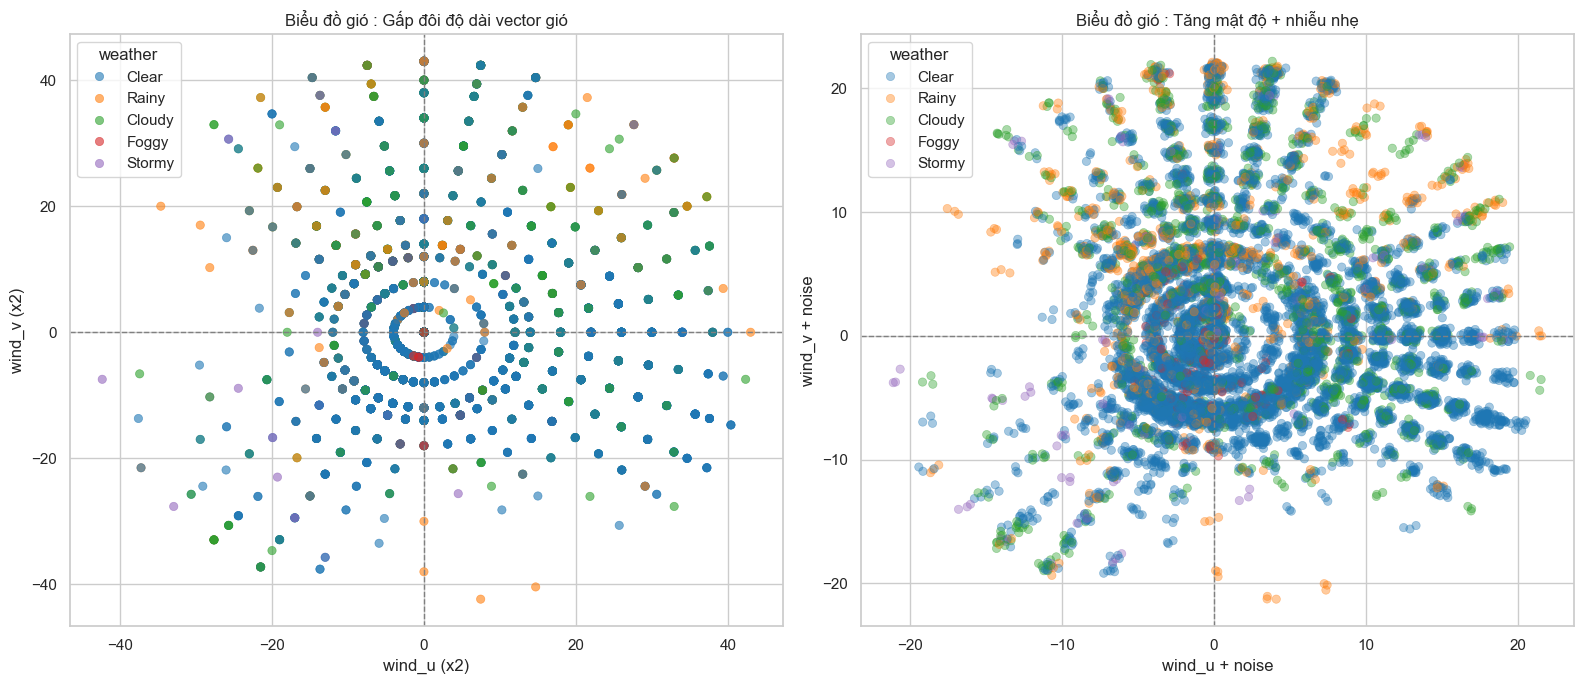

In [83]:
# Select relevant columns
cols_to_plot = ['wind_u', 'wind_v', 'weather']
df_plot = df[cols_to_plot].copy()

# Sample for visualization consistency
df_sampled = df_plot.sample(5000, random_state=42)

# --------- C√°ch 2: Nh√¢n gi√° tr·ªã wind_u, wind_v l√™n (gi√£n ra) ----------
df_scaled = df_sampled.copy()
df_scaled['wind_u'] *= 2
df_scaled['wind_v'] *= 2

# --------- C√°ch 3: Nh√¢n b·∫£n d·ªØ li·ªáu (tƒÉng m·∫≠t ƒë·ªô) + th√™m nhi·ªÖu nh·ªè ----------
df_augmented = pd.concat([df_sampled]*3, ignore_index=True)
noise = np.random.normal(loc=0, scale=0.3, size=df_augmented[['wind_u', 'wind_v']].shape)
df_augmented[['wind_u', 'wind_v']] += noise

# --------- Plot c·∫£ 2 bi·ªÉu ƒë·ªì ƒë·ªÉ so s√°nh ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bi·ªÉu ƒë·ªì v·ªõi vector gi√£n ra
sns.scatterplot(
    data=df_scaled, x='wind_u', y='wind_v', hue='weather', alpha=0.6,
    palette='tab10', edgecolor=None, ax=axes[0]
)
axes[0].axhline(0, color='gray', linestyle='--', lw=1)
axes[0].axvline(0, color='gray', linestyle='--', lw=1)
axes[0].set_title("Bi·ªÉu ƒë·ªì gi√≥ : G·∫•p ƒë√¥i ƒë·ªô d√†i vector gi√≥")
axes[0].set_xlabel("wind_u (x2)")
axes[0].set_ylabel("wind_v (x2)")

# Bi·ªÉu ƒë·ªì v·ªõi d·ªØ li·ªáu nh√¢n b·∫£n + nhi·ªÖu
sns.scatterplot(
    data=df_augmented, x='wind_u', y='wind_v', hue='weather', alpha=0.4,
    palette='tab10', edgecolor=None, ax=axes[1]
)
axes[1].axhline(0, color='gray', linestyle='--', lw=1)
axes[1].axvline(0, color='gray', linestyle='--', lw=1)
axes[1].set_title("Bi·ªÉu ƒë·ªì gi√≥ : TƒÉng m·∫≠t ƒë·ªô + nhi·ªÖu nh·∫π")
axes[1].set_xlabel("wind_u + noise")
axes[1].set_ylabel("wind_v + noise")

plt.tight_layout()
plt.show()

In [84]:
print(df['weather'].value_counts())


weather
Clear     59321
Cloudy    11932
Rainy      8099
Foggy      1761
Stormy      895
Name: count, dtype: int64


| Lo·∫°i th·ªùi ti·∫øt     | ƒê·∫∑c ƒëi·ªÉm vector gi√≥ d·ªÖ th·∫•y                                                | H∆∞·ªõng gi√≥ ƒë·∫∑c tr∆∞ng (x·∫•p x·ªâ)           |
|--------------------|-----------------------------------------------------------------------------|----------------------------------------|
| ‚òÄÔ∏è Clear           | C√°c ƒëi·ªÉm t·∫≠p trung g·∫ßn g·ªëc t·ªça ƒë·ªô, h∆∞·ªõng gi√≥ y·∫øu, ph√¢n b·ªë ƒë·ªÅu c√°c h∆∞·ªõng     | Kh√¥ng r√µ r√†ng, h∆∞·ªõng ph√¢n t√°n          |
| üåßÔ∏è Rain           | Vector d√†i h∆°n, l·ªách r√µ r·ªát v·ªÅ m·ªôt h∆∞·ªõng (v√≠ d·ª•: u √¢m, v d∆∞∆°ng ‚Üí T√¢y Nam)   | T√¢y Nam ho·∫∑c ƒê√¥ng B·∫Øc                  |
| üå´Ô∏è Fog            | Gi√≥ y·∫øu, g·∫ßn t√¢m, nh∆∞ng c√≥ xu h∆∞·ªõng l·ªách v·ªÅ m·ªôt g√≥c c·ª• th·ªÉ                  | H∆∞·ªõng nh·∫π, c√≥ th·ªÉ B·∫Øc ho·∫∑c T√¢y B·∫Øc     |
| üå©Ô∏è Thunderstorms  | C√°c ƒëi·ªÉm th∆∞·ªùng c√≥ ƒë·ªô d√†i l·ªõn (gi√≥ m·∫°nh), h∆∞·ªõng kh√° nh·∫•t qu√°n               | Th∆∞·ªùng l·ªách v·ªÅ 1‚Äì2 g√≥c c·ª• th·ªÉ          |
| ‚òÅÔ∏è Cloudy          | Ph√¢n t√°n ƒë·ªÅu, nh∆∞ng v·∫´n c√≥ m·∫≠t ƒë·ªô l·ªách nh·∫π v·ªÅ c√°c v√πng c√≥ gi√≥ trung b√¨nh    | H∆°i nghi√™ng v·ªÅ T√¢y ho·∫∑c ƒê√¥ng           |


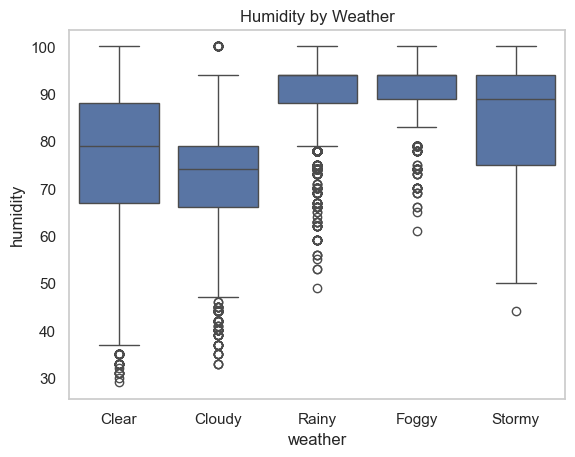

In [85]:
# Boxplot: humidity by Weather
sns.boxplot(x='weather', y='humidity', data=df)
plt.title('Humidity by Weather')
plt.grid(False)
plt.show()


4. Humidity by Weather

    Nh·∫≠n x√©t:
    - ƒê·ªô ·∫©m trung b√¨nh c√≥ s·ª± kh√°c bi·ªát r√µ r·ªát gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt:
    - Foggy v√† Rainy c√≥ ƒë·ªô ·∫©m cao nh·∫•t, trung b√¨nh kho·∫£ng 90-100%, v·ªõi √≠t gi√° tr·ªã ngo·∫°i lai.
    - Clear v√† Cloudy c√≥ ƒë·ªô ·∫©m th·∫•p h∆°n, trung b√¨nh kho·∫£ng 70-80%.
    - Stormy n·∫±m ·ªü gi·ªØa, v·ªõi ƒë·ªô ·∫©m trung b√¨nh kho·∫£ng 80-90%.
    - Ph√¢n b·ªë ƒë·ªô ·∫©m c·ªßa Foggy v√† Rainy r·∫•t t·∫≠p trung (IQR h·∫πp), trong khi Clear v√† Cloudy c√≥ ph√¢n b·ªë r·ªông h∆°n.
    
    K·∫øt lu·∫≠n:
    - Humidity l√† m·ªôt ƒë·∫∑c tr∆∞ng r·∫•t quan tr·ªçng cho b√†i to√°n ph√¢n lo·∫°i, v√¨ n√≥ ph√¢n bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt (ƒë·∫∑c bi·ªát l√† Foggy/Rainy v·ªõi Clear/Cloudy).
    - Trong b√†i to√°n ph√¢n c·ª•m, ƒë·ªô ·∫©m c≈©ng s·∫Ω ƒë√≥ng vai tr√≤ l·ªõn trong vi·ªác h√¨nh th√†nh c√°c c·ª•m (v√≠ d·ª•: c·ª•m th·ªùi ti·∫øt "·∫©m ∆∞·ªõt" nh∆∞ Foggy v√† Rainy, v√† c·ª•m "kh√¥" nh∆∞ Clear).

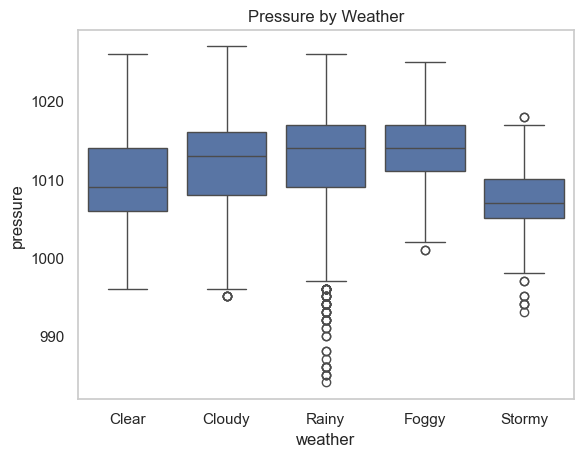

In [86]:
# Boxplot: pressure by Weather
sns.boxplot(x='weather', y='pressure', data=df)
plt.title('Pressure by Weather')
plt.grid(False)
plt.show()


5. Pressure by Weather

    Nh·∫≠n x√©t:
    - √Åp su·∫•t trung b√¨nh dao ƒë·ªông t·ª´ 1000-1020 hPa, nh∆∞ng c√≥ s·ª± kh√°c bi·ªát gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt:
    - Clear v√† Cloudy c√≥ √°p su·∫•t cao h∆°n, trung b√¨nh kho·∫£ng 1010-1020 hPa.
    - Rainy, Foggy, v√† Stormy c√≥ √°p su·∫•t th·∫•p h∆°n, trung b√¨nh kho·∫£ng 1000-1010 hPa.
    - Ph√¢n b·ªë √°p su·∫•t c·ªßa Rainy, Foggy, v√† Stormy c√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i lai th·∫•p (d∆∞·ªõi 990 hPa), cho th·∫•y √°p su·∫•t gi·∫£m m·∫°nh trong c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt x·∫•u.
    
    K·∫øt lu·∫≠n:
    - Pressure l√† m·ªôt ƒë·∫∑c tr∆∞ng quan tr·ªçng cho b√†i to√°n ph√¢n lo·∫°i, v√¨ √°p su·∫•t th·∫•p th∆∞·ªùng li√™n quan ƒë·∫øn th·ªùi ti·∫øt x·∫•u (Rainy, Foggy, Stormy), trong khi √°p su·∫•t cao li√™n quan ƒë·∫øn th·ªùi ti·∫øt t·ªët (Clear, Cloudy).
    - ƒê·∫∑c tr∆∞ng n√†y c≈©ng h·ªØu √≠ch cho b√†i to√°n ph√¢n c·ª•m, v√¨ n√≥ c√≥ th·ªÉ gi√∫p ph√¢n bi·ªát c√°c c·ª•m th·ªùi ti·∫øt "·ªïn ƒë·ªãnh" (√°p su·∫•t cao) v√† "b·∫•t ·ªïn" (√°p su·∫•t th·∫•p).

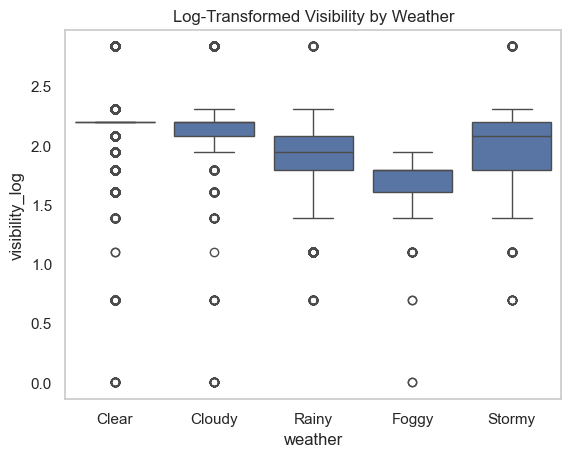

In [87]:
# Boxplot: visibility by Weather
sns.boxplot(x='weather', y='visibility_log', data=df)
plt.title('Log-Transformed Visibility by Weather')
plt.grid(False)
plt.show()

6. Visibility by Weather

    Nh·∫≠n x√©t:
    - T·∫ßm nh√¨n c√≥ s·ª± kh√°c bi·ªát r·∫•t r√µ r·ªát gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt:
    - Clear c√≥ t·∫ßm nh√¨n cao nh·∫•t, trung b√¨nh kho·∫£ng 10-15 km.
    - Cloudy th·∫•p h∆°n m·ªôt ch√∫t, trung b√¨nh kho·∫£ng 8-12 km.
    - Rainy, Foggy, v√† Stormy c√≥ t·∫ßm nh√¨n r·∫•t th·∫•p, trung b√¨nh d∆∞·ªõi 5 km, ƒë·∫∑c bi·ªát Foggy c√≥ t·∫ßm nh√¨n th·∫•p nh·∫•t (th∆∞·ªùng d∆∞·ªõi 2 km).
    - Ph√¢n b·ªë c·ªßa Foggy r·∫•t t·∫≠p trung (IQR r·∫•t h·∫πp), trong khi Clear v√† Cloudy c√≥ ph√¢n b·ªë r·ªông h∆°n.
    
    K·∫øt lu·∫≠n:
    - Visibility l√† m·ªôt ƒë·∫∑c tr∆∞ng c·ª±c k·ª≥ quan tr·ªçng cho b√†i to√°n ph√¢n lo·∫°i, v√¨ n√≥ ph√¢n bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt (ƒë·∫∑c bi·ªát l√† Foggy v·ªõi c√°c lo·∫°i kh√°c).
    - Trong b√†i to√°n ph√¢n c·ª•m, t·∫ßm nh√¨n s·∫Ω gi√∫p h√¨nh th√†nh c√°c c·ª•m th·ªùi ti·∫øt "t·∫ßm nh√¨n th·∫•p" (Foggy, Rainy, Stormy) v√† "t·∫ßm nh√¨n cao" (Clear, Cloudy).

Cho B√†i to√°n Ph√¢n lo·∫°i

- ƒê·∫∑c tr∆∞ng quan tr·ªçng (n√™n gi·ªØ l·∫°i):
    - Humidity: Ph√¢n bi·ªát r√µ r√†ng gi·ªØa th·ªùi ti·∫øt ·∫©m (Foggy, Rainy) v√† kh√¥ (Clear, Cloudy).
    - Visibility: Ph√¢n bi·ªát m·∫°nh m·∫Ω gi·ªØa Foggy v√† c√°c lo·∫°i th·ªùi ti·∫øt kh√°c.
    - Pressure: Ph√¢n bi·ªát th·ªùi ti·∫øt ·ªïn ƒë·ªãnh (Clear, Cloudy) v√† b·∫•t ·ªïn (Rainy, Foggy, Stormy).
    - Wind_speed: Ph√¢n bi·ªát Rainy (gi√≥ m·∫°nh) v√† Foggy (gi√≥ y·∫øu).
- ƒê·∫∑c tr∆∞ng √≠t quan tr·ªçng (c√≥ th·ªÉ lo·∫°i b·ªè):
    - Temperature: Kh√¥ng c√≥ s·ª± kh√°c bi·ªát r√µ r√†ng gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt.
    - Wind_angle: Ph√¢n b·ªë kh√¥ng kh√°c bi·ªát nhi·ªÅu gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt.

Cho B√†i to√°n Ph√¢n c·ª•m

- ƒê·∫∑c tr∆∞ng n√™n gi·ªØ l·∫°i:
    - Humidity, Visibility, Pressure, Wind_speed: C√°c ƒë·∫∑c tr∆∞ng n√†y c√≥ s·ª± kh√°c bi·ªát l·ªõn gi·ªØa c√°c lo·∫°i th·ªùi ti·∫øt, gi√∫p h√¨nh th√†nh c√°c c·ª•m c√≥ √Ω nghƒ©a.
    - Temperature: M·∫∑c d√π kh√¥ng ph√¢n bi·ªát r√µ cho ph√¢n lo·∫°i, nh∆∞ng v·∫´n c√≥ th·ªÉ ƒë√≥ng vai tr√≤ trong ph√¢n c·ª•m (v√≠ d·ª•: c·ª•m th·ªùi ti·∫øt "n√≥ng" ho·∫∑c "l·∫°nh").
    - Wind_angle: C√≥ th·ªÉ gi·ªØ l·∫°i n·∫øu b·∫°n mu·ªën ph√¢n c·ª•m d·ª±a tr√™n h∆∞·ªõng gi√≥, nh∆∞ng c·∫ßn k·∫øt h·ª£p v·ªõi wind_speed.


### 2.2 Ph√¢n t√≠ch ƒë·∫∑c tr∆∞ng th·ªùi gian

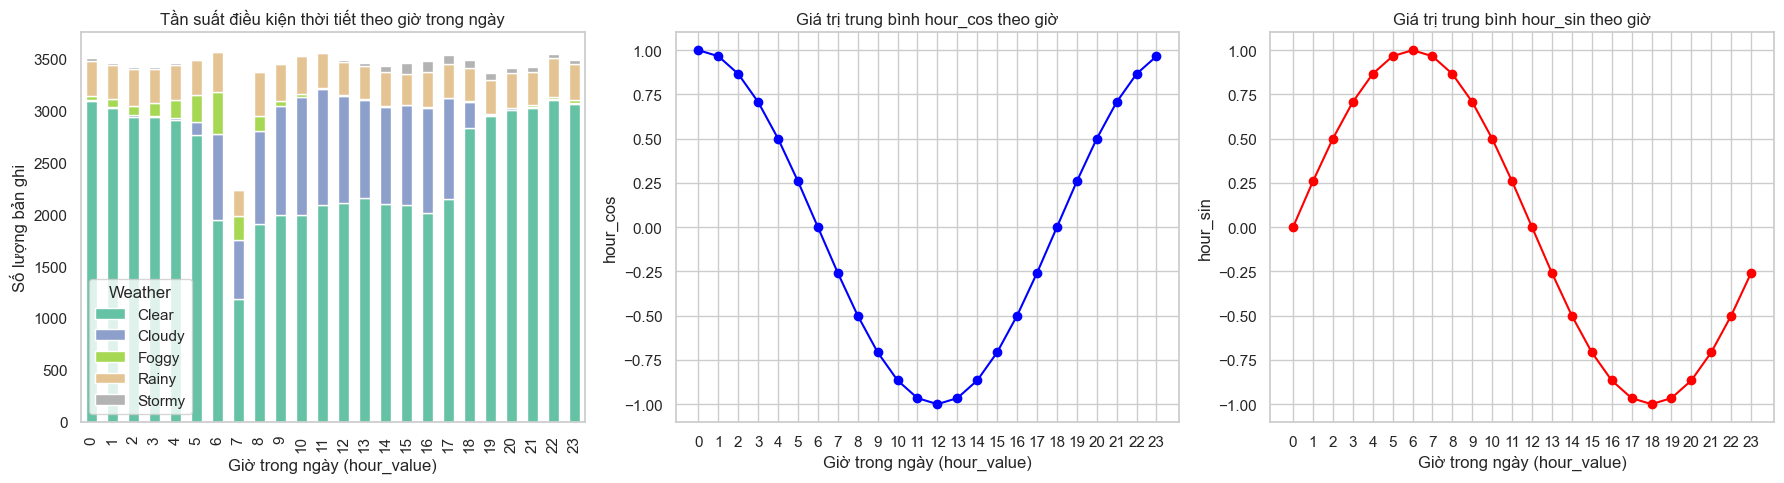

In [88]:
# T·∫°o c·ªôt th·ªùi gian ƒë·∫ßy ƒë·ªß (n·∫øu c·∫ßn)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour_value', 'minute']].rename(columns={'hour_value': 'hour', 'minute': 'minute'}))

# ƒê·∫øm t·∫ßn su·∫•t ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt theo gi·ªù
weather_by_hour = df.groupby(['hour_value', 'weather']).size().unstack(fill_value=0)


plt.figure(figsize=(18, 5))

# 1. Bi·ªÉu ƒë·ªì c·ªôt x·∫øp ch·ªìng t·∫ßn su·∫•t weather theo hour_value
plt.subplot(1, 3, 1)
weather_by_hour.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('T·∫ßn su·∫•t ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt theo gi·ªù trong ng√†y')
plt.xlabel('Gi·ªù trong ng√†y (hour_value)')
plt.ylabel('S·ªë l∆∞·ª£ng b·∫£n ghi')
plt.legend(title='Weather')
plt.grid(False)

# 2. Bi·ªÉu ƒë·ªì trung b√¨nh hour_cos theo hour_value
plt.subplot(1, 3, 2)
mean_hour_cos = df.groupby('hour_value')['hour_cos'].mean()
plt.plot(mean_hour_cos.index, mean_hour_cos.values, marker='o', color='blue')
plt.title('Gi√° tr·ªã trung b√¨nh hour_cos theo gi·ªù')
plt.xlabel('Gi·ªù trong ng√†y (hour_value)')
plt.ylabel('hour_cos')
plt.xticks(mean_hour_cos.index)
plt.grid(True)

# 3. Bi·ªÉu ƒë·ªì trung b√¨nh hour_sin theo hour_value
plt.subplot(1, 3, 3)
mean_hour_sin = df.groupby('hour_value')['hour_sin'].mean()
plt.plot(mean_hour_sin.index, mean_hour_sin.values, marker='o', color='red')
plt.title('Gi√° tr·ªã trung b√¨nh hour_sin theo gi·ªù')
plt.xlabel('Gi·ªù trong ng√†y (hour_value)')
plt.ylabel('hour_sin')
plt.xticks(mean_hour_sin.index)
plt.grid(True)

plt.tight_layout()
plt.show()

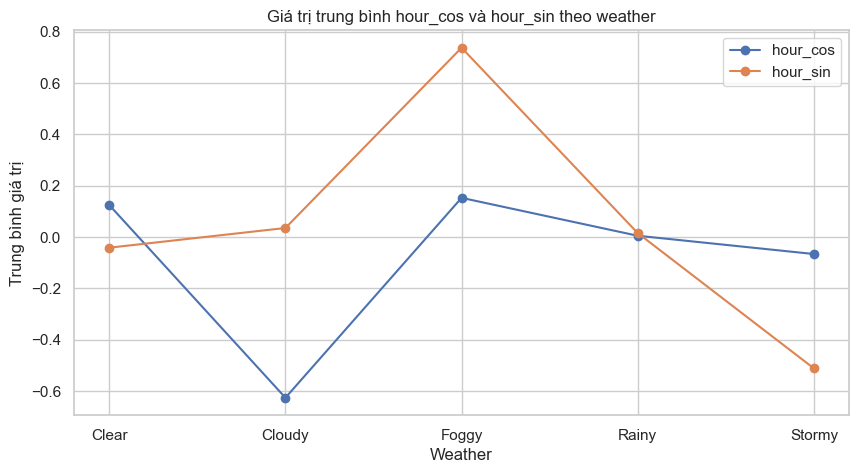

In [89]:
# T√≠nh trung b√¨nh cos, sin theo weather
mean_cos = df.groupby('weather')['hour_cos'].mean()
mean_sin = df.groupby('weather')['hour_sin'].mean()

plt.figure(figsize=(10,5))

plt.plot(mean_cos.index, mean_cos.values, marker='o', label='hour_cos')
plt.plot(mean_sin.index, mean_sin.values, marker='o', label='hour_sin')

plt.title('Gi√° tr·ªã trung b√¨nh hour_cos v√† hour_sin theo weather')
plt.xlabel('Weather')
plt.ylabel('Trung b√¨nh gi√° tr·ªã')
plt.legend()
plt.grid(True)
plt.show()

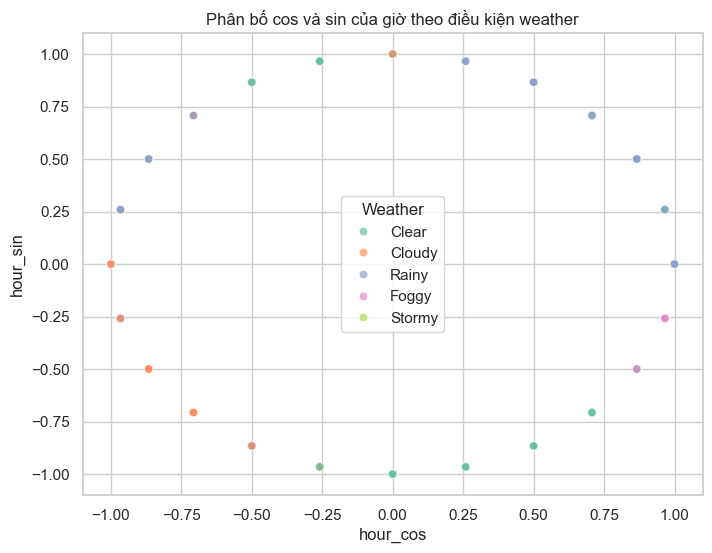

In [90]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='hour_cos', y='hour_sin', hue='weather', palette='Set2', alpha=0.7)
plt.title('Ph√¢n b·ªë cos v√† sin c·ªßa gi·ªù theo ƒëi·ªÅu ki·ªán weather')
plt.xlabel('hour_cos')
plt.ylabel('hour_sin')
plt.legend(title='Weather')
plt.show()

1. Ph√¢n b·ªë t·ªïng th·ªÉ
    - ƒêi·ªÅu ki·ªán Clear (m√†u xanh l√°) chi·∫øm t·ª∑ l·ªá l·ªõn nh·∫•t ·ªü h·∫ßu h·∫øt c√°c gi·ªù, cho th·∫•y th·ªùi ti·∫øt trong l√†nh l√† ph·ªï bi·∫øn nh·∫•t trong ng√†y.
    - Cloudy (m√†u xanh d∆∞∆°ng) v√† Rainy (m√†u cam) c≈©ng xu·∫•t hi·ªán ƒë√°ng k·ªÉ, nh∆∞ng √≠t h∆°n Clear.
    - Foggy (m√†u v√†ng) v√† Stormy (m√†u x√°m) c√≥ t·∫ßn su·∫•t th·∫•p, v·ªõi Stormy r·∫•t hi·∫øm.
2. Xu h∆∞·ªõng theo gi·ªù
    - Ban ƒë√™m v√† s√°ng s·ªõm (0h-7h):

        Clear v·∫´n chi·∫øm ∆∞u th·∫ø, nh∆∞ng Foggy xu·∫•t hi·ªán nhi·ªÅu h∆°n, ƒë·∫∑c bi·ªát v√†o kho·∫£ng 4h-7h, c√≥ th·ªÉ do s∆∞∆°ng m√π th∆∞·ªùng xu·∫•t hi·ªán v√†o s√°ng s·ªõm.
        Rainy c≈©ng tƒÉng nh·∫π v√†o kho·∫£ng 5h-7h, cho th·∫•y kh·∫£ nƒÉng c√≥ m∆∞a nh·ªè v√†o th·ªùi ƒëi·ªÉm n√†y.

    - Bu·ªïi s√°ng (8h-11h):

        Clear ti·∫øp t·ª•c chi·∫øm ƒëa s·ªë, nh∆∞ng Cloudy tƒÉng l√™n, cho th·∫•y tr·ªùi c√≥ th·ªÉ nhi·ªÅu m√¢y h∆°n v√†o bu·ªïi s√°ng.
        Rainy gi·∫£m d·∫ßn, √≠t xu·∫•t hi·ªán h∆°n so v·ªõi s√°ng s·ªõm.

    - Bu·ªïi tr∆∞a v√† chi·ªÅu (12h-17h):

        ƒê√¢y l√† th·ªùi ƒëi·ªÉm Clear ƒë·∫°t t·ª∑ l·ªá cao nh·∫•t, v·ªõi √≠t Rainy v√† Foggy, cho th·∫•y th·ªùi ti·∫øt ·ªïn ƒë·ªãnh, tr·ªùi quang v√†o gi·ªØa ng√†y.
        Cloudy v·∫´n c√≥ m·∫∑t nh∆∞ng kh√¥ng qu√° n·ªïi b·∫≠t.

    - Bu·ªïi t·ªëi (18h-23h):

        Clear v·∫´n chi·∫øm ∆∞u th·∫ø, nh∆∞ng Cloudy v√† Rainy tƒÉng nh·∫π, ƒë·∫∑c bi·ªát v√†o kho·∫£ng 19h-22h, c√≥ th·ªÉ do th·ªùi ti·∫øt thay ƒë·ªïi v√†o bu·ªïi t·ªëi.
        Foggy tƒÉng nh·∫π v√†o 22h-23h, c√≥ th·ªÉ li√™n quan ƒë·∫øn ƒë·ªô ·∫©m tƒÉng v√†o ban ƒë√™m.
3. K·∫øt lu·∫≠n
- Th·ªùi ti·∫øt ·ªïn ƒë·ªãnh v√†o gi·ªØa ng√†y: Th·ªùi gian t·ª´ 12h-17h c√≥ t·ª∑ l·ªá Clear cao nh·∫•t, ph√π h·ª£p v·ªõi th·ªùi ti·∫øt n·∫Øng v√† ·ªïn ƒë·ªãnh.
- S√°ng s·ªõm v√† t·ªëi mu·ªôn c√≥ bi·∫øn ƒë·ªông: Foggy v√† Rainy xu·∫•t hi·ªán nhi·ªÅu h∆°n v√†o 4h-7h v√† 19h-23h, cho th·∫•y th·ªùi ti·∫øt d·ªÖ thay ƒë·ªïi v√†o c√°c khung gi·ªù n√†y.
- ƒê·∫∑c tr∆∞ng gi·ªù r·∫•t quan tr·ªçng: S·ª± thay ƒë·ªïi r√µ r·ªát c·ªßa c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt theo gi·ªù cho th·∫•y ƒë·∫∑c tr∆∞ng hour_value r·∫•t c·∫ßn thi·∫øt cho m√¥ h√¨nh d·ª± ƒëo√°n th·ªùi ti·∫øt, ƒë·∫∑c bi·ªát n·∫øu c·∫ßn d·ª± ƒëo√°n weather, temperature, ho·∫∑c humidity. N√™n x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng n√†y (v√≠ d·ª•: m√£ h√≥a chu k·ª≥ b·∫±ng sin/cos) ƒë·ªÉ m√¥ h√¨nh h·ªçc t·ªët h∆°n.

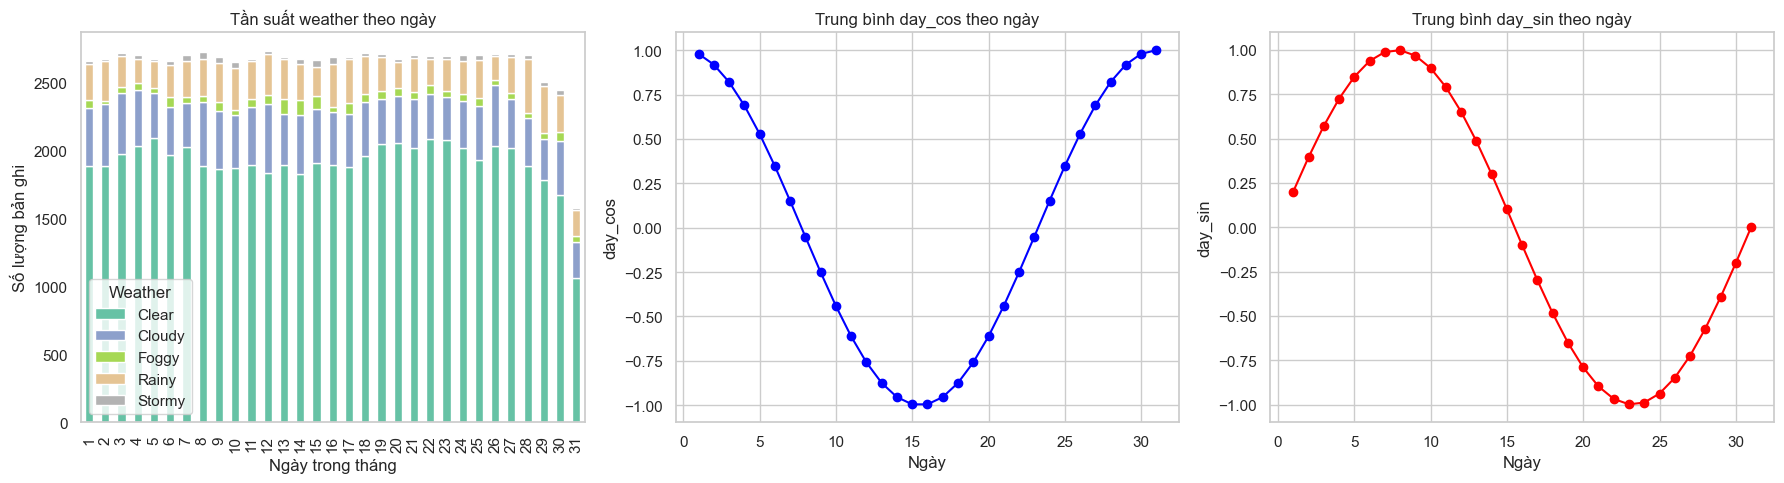

In [92]:
# T·∫ßn su·∫•t weather theo day
weather_by_day = df.groupby(['day', 'weather']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 5))

# Bi·ªÉu ƒë·ªì c·ªôt x·∫øp ch·ªìng weather
plt.subplot(1, 3, 1)
weather_by_day.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('T·∫ßn su·∫•t weather theo ng√†y')
plt.xlabel('Ng√†y trong th√°ng')
plt.ylabel('S·ªë l∆∞·ª£ng b·∫£n ghi')
plt.grid(False)
plt.legend(title='Weather')

# Trung b√¨nh day_cos theo ng√†y
plt.subplot(1, 3, 2)
mean_day_cos = df.groupby('day')['day_cos'].mean()
plt.plot(mean_day_cos.index, mean_day_cos.values, marker='o', color='blue')
plt.title('Trung b√¨nh day_cos theo ng√†y')
plt.xlabel('Ng√†y')
plt.ylabel('day_cos')
plt.grid(True)

# Trung b√¨nh day_sin theo ng√†y
plt.subplot(1, 3, 3)
mean_day_sin = df.groupby('day')['day_sin'].mean()
plt.plot(mean_day_sin.index, mean_day_sin.values, marker='o', color='red')
plt.title('Trung b√¨nh day_sin theo ng√†y')
plt.xlabel('Ng√†y')
plt.ylabel('day_sin')
plt.grid(True)

plt.tight_layout()
plt.show()


Nh·∫≠n x√©t: 
- Bi·ªÉu ƒë·ªì cho th·∫•y ƒëi·ªÅu ki·ªán Clear chi·∫øm ∆∞u th·∫ø r√µ r·ªát trong h·∫ßu h·∫øt c√°c ng√†y trong th√°ng, v·ªõi s·ª± hi·ªán di·ªán ƒë√°ng k·ªÉ c·ªßa Cloudy v√† Rainy, trong khi Foggy v√† Stormy r·∫•t hi·∫øm. T·∫ßn su·∫•t c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt kh√° ƒë·ªìng ƒë·ªÅu gi·ªØa c√°c ng√†y, v·ªõi m·ªôt s·ªë bi·∫øn ƒë·ªông nh·ªè, ƒë·∫∑c bi·ªát ng√†y 31 c√≥ s·ªë l∆∞·ª£ng b·∫£n ghi gi·∫£m, c√≥ th·ªÉ do d·ªØ li·ªáu thi·∫øu h·ª•t.
- Bi·ªÉu ƒë·ªì theo ng√†y cho th·∫•y ph√¢n b·ªë th·ªùi ti·∫øt kh√° ƒë·ªìng ƒë·ªÅu, nh∆∞ng v·∫´n c√≥ bi·∫øn ƒë·ªông nh·ªè, cho th·∫•y day c√≥ th·ªÉ b·ªï sung th√¥ng tin chi ti·∫øt h∆°n.

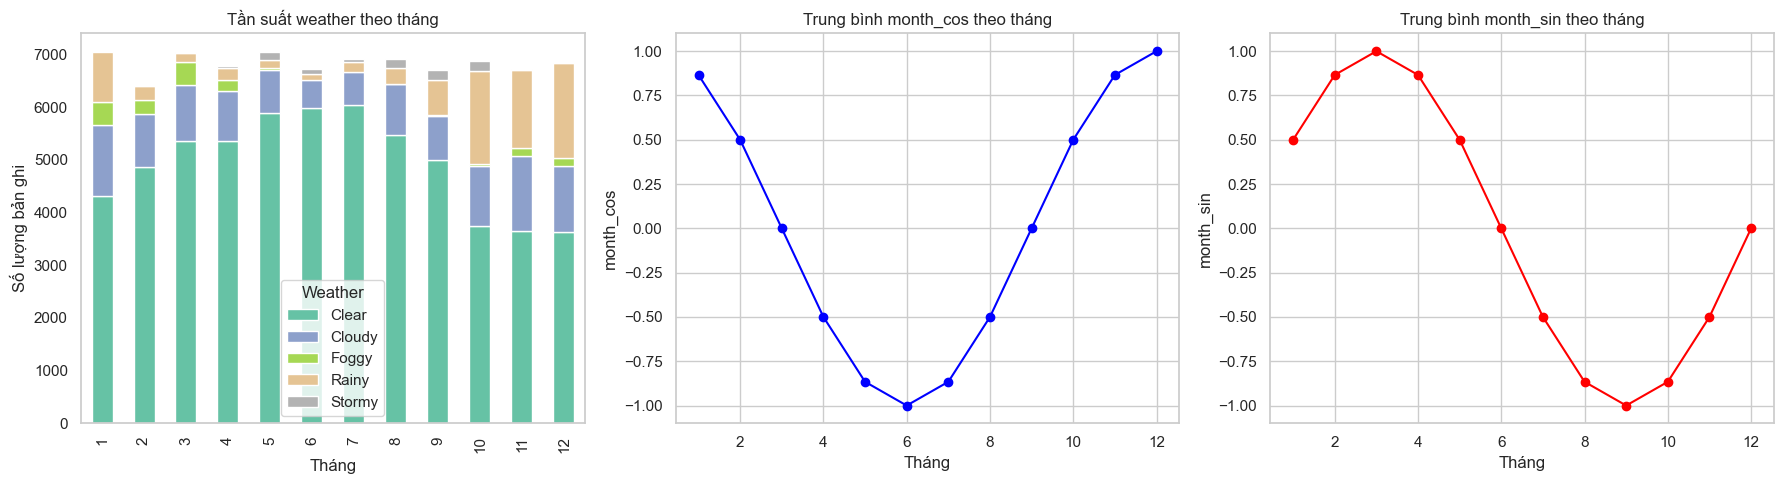

In [93]:
# T·∫ßn su·∫•t weather theo month
weather_by_month = df.groupby(['month', 'weather']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 5))

# Bi·ªÉu ƒë·ªì c·ªôt x·∫øp ch·ªìng weather
plt.subplot(1, 3, 1)
weather_by_month.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('T·∫ßn su·∫•t weather theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('S·ªë l∆∞·ª£ng b·∫£n ghi')
plt.grid(False)
plt.legend(title='Weather')

# Trung b√¨nh month_cos theo th√°ng
plt.subplot(1, 3, 2)
mean_month_cos = df.groupby('month')['month_cos'].mean()
plt.plot(mean_month_cos.index, mean_month_cos.values, marker='o', color='blue')
plt.title('Trung b√¨nh month_cos theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('month_cos')
plt.grid(True)

# Trung b√¨nh month_sin theo th√°ng
plt.subplot(1, 3, 3)
mean_month_sin = df.groupby('month')['month_sin'].mean()
plt.plot(mean_month_sin.index, mean_month_sin.values, marker='o', color='red')
plt.title('Trung b√¨nh month_sin theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('month_sin')
plt.grid(True)

plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:

- M·ªëi quan h·ªá v·ªõi bi·∫øn m·ª•c ti√™u: T·ª´ bi·ªÉu ƒë·ªì, ta th·∫•y month c√≥ ·∫£nh h∆∞·ªüng r√µ r·ªát ƒë·∫øn ph√¢n b·ªë c√°c ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt (weather). ƒêi·ªÅu n√†y cho th·∫•y month l√† m·ªôt ƒë·∫∑c tr∆∞ng quan tr·ªçng n·∫øu m·ª•c ti√™u c·ªßa m√¥ h√¨nh l√† d·ª± ƒëo√°n weather ho·∫∑c c√°c bi·∫øn th·ªùi ti·∫øt kh√°c nh∆∞ temperature, humidity.

- T√≠nh chu k·ª≥: Month th·ªÉ hi·ªán t√≠nh chu k·ª≥ h√†ng nƒÉm c·ªßa th·ªùi ti·∫øt (v√≠ d·ª•: m√πa kh√¥, m√πa m∆∞a). N·∫øu kh√¥ng x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng n√†y, m√¥ h√¨nh c√≥ th·ªÉ kh√¥ng nh·∫≠n ra c√°c m·∫´u theo m√πa, d·∫´n ƒë·∫øn hi·ªáu su·∫•t d·ª± ƒëo√°n k√©m.

- Bi·∫øn ƒë·ªông theo th·ªùi gian: S·ª± thay ƒë·ªïi trong t·∫ßn su·∫•t c·ªßa Rainy v√† Foggy theo th√°ng cho th·∫•y month mang th√¥ng tin gi√° tr·ªã, gi√∫p m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c c√°c xu h∆∞·ªõng th·ªùi ti·∫øt theo m√πa.

<Figure size 1200x600 with 0 Axes>

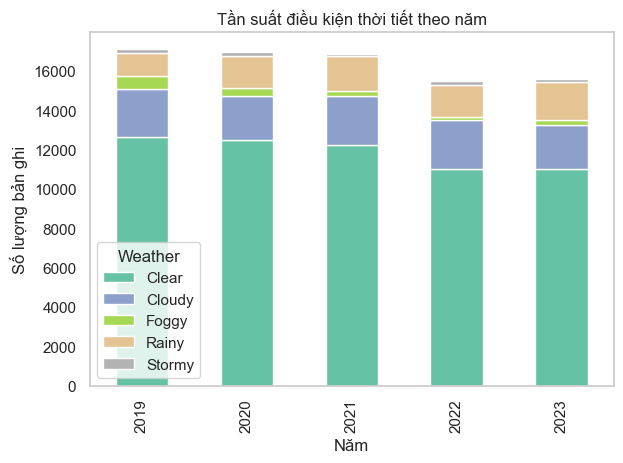

In [55]:
# ƒê·∫øm t·∫ßn su·∫•t ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt theo nƒÉm
weather_by_year = df.groupby(['year', 'weather']).size().unstack(fill_value=0)

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt x·∫øp ch·ªìng
plt.figure(figsize=(12, 6))
weather_by_year.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('T·∫ßn su·∫•t ƒëi·ªÅu ki·ªán th·ªùi ti·∫øt theo nƒÉm')
plt.xlabel('NƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng b·∫£n ghi')
plt.legend(title='Weather')
plt.tight_layout()
plt.grid(False)
plt.show()

Nh·∫≠n x√©t:

- M·ªëi quan h·ªá v·ªõi bi·∫øn m·ª•c ti√™u: T·ª´ bi·ªÉu ƒë·ªì, ta th·∫•y kh√¥ng c√≥ s·ª± kh√°c bi·ªát qu√° nhi·ªÅu v·ªÅ th·ªùi ti·∫øt gi·ªØa c√°c nƒÉm.

- Bi·∫øn ƒë·ªông theo th·ªùi gian: S·ª± thay ƒë·ªïi trong t·∫ßn su·∫•t c·ªßa Foggy theo nƒÉm r·∫•t nh·ªè, tuy nhi√™n c√≥ th·ªÉ mang th√¥ng tin gi√° tr·ªã. Bi·∫øn nƒÉm l√† 1 bi·∫øn kh√¥ng qu√° quan tr·ªçng cho b√†i to√†n ph√¢n lo·∫°i v√† ph√¢n c·ª•m.

## 3. K·∫øt lu·∫≠n
D·ª±a tr√™n ph√¢n t√≠ch, c√°c ƒë·∫∑c tr∆∞ng n√™n s·ª≠ d·ª•ng:

- Temperature, humidity, pressure, wind_speed, visibility: C√≥ kh·∫£ nƒÉng ·∫£nh h∆∞·ªüng m·∫°nh ƒë·∫øn th·ªùi ti·∫øt.
- Time (t·ª´ hour_value): Ph·∫£n √°nh xu h∆∞·ªõng th·ªùi ti·∫øt theo th·ªùi gian trong ng√†y.
- Month: Ph·∫£n √°nh xu h∆∞·ªõng th·ªùi ti·∫øt theo m√πa, c√≥ th·ªÉ r√∫t g·ªçn  l·∫°i th√†nh 4 m√πa ƒë·ªÉ m√¥ h√¨nh d·ªÖ h·ªçc h∆°n
- Day, year: kh√¥ng ph·∫£i l√† ƒë·∫∑c tr∆∞ng m·∫°nh